In [8]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#download the optical recognition of handwritten digits
%pip install ucimlrepo 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80) 

  
# data (as pandas dataframes) 
X = optical_recognition_of_handwritten_digits.data.features 
y = optical_recognition_of_handwritten_digits.data.targets 
  
# metadata 
print(optical_recognition_of_handwritten_digits.metadata) 
  
# variable information 
print(optical_recognition_of_handwritten_digits.variables) 

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [10]:
#EDA - the data is split into two different dataframes. 
X.head()

Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           1           6          15          12           1   
1           0           0          10          16           6           0   
2           0           0           8          15          16          13   
3           0           0           0           3          11          16   
4           0           0           5          14           4           0   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute55  \
0           0           0           0            7  ...            0   
1           0           0           0            7  ...            3   
2           0           0           0            1  ...            0   
3           0           0           0            0  ...            0   
4           0           0           0            0  ...           12   

   Attribute56  Attribute57  Attribute58  Attribute59  Attribute60  \
0            0            0            0            6           14   
1            0            0            0           10           16   
2            0            0            0            9           14   
3            0            0            0            0            1   
4            0            0            0            4           12   

   Attribute61  Attribute62  Attribute63  Attribute64  
0            7            1            0            0  
1           15            3            0            0  
2            0            0            0            0  
3           15            2            0            0  
4           14            7            0            0  

[5 rows x 64 columns]

In [11]:
y.head()

class
0      0
1      0
2      7
3      4
4      6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


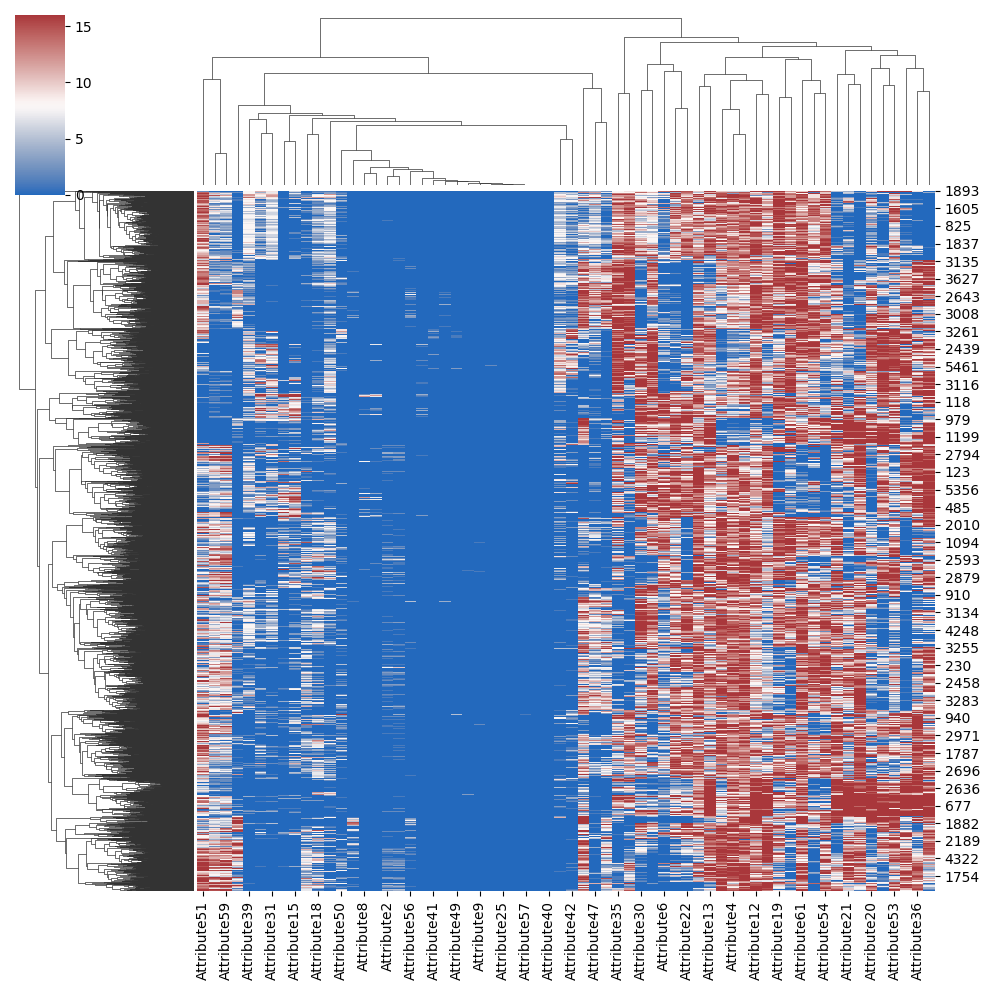

In [12]:
#create a clustermap for collinearity
sns.clustermap(X,cmap="vlag")

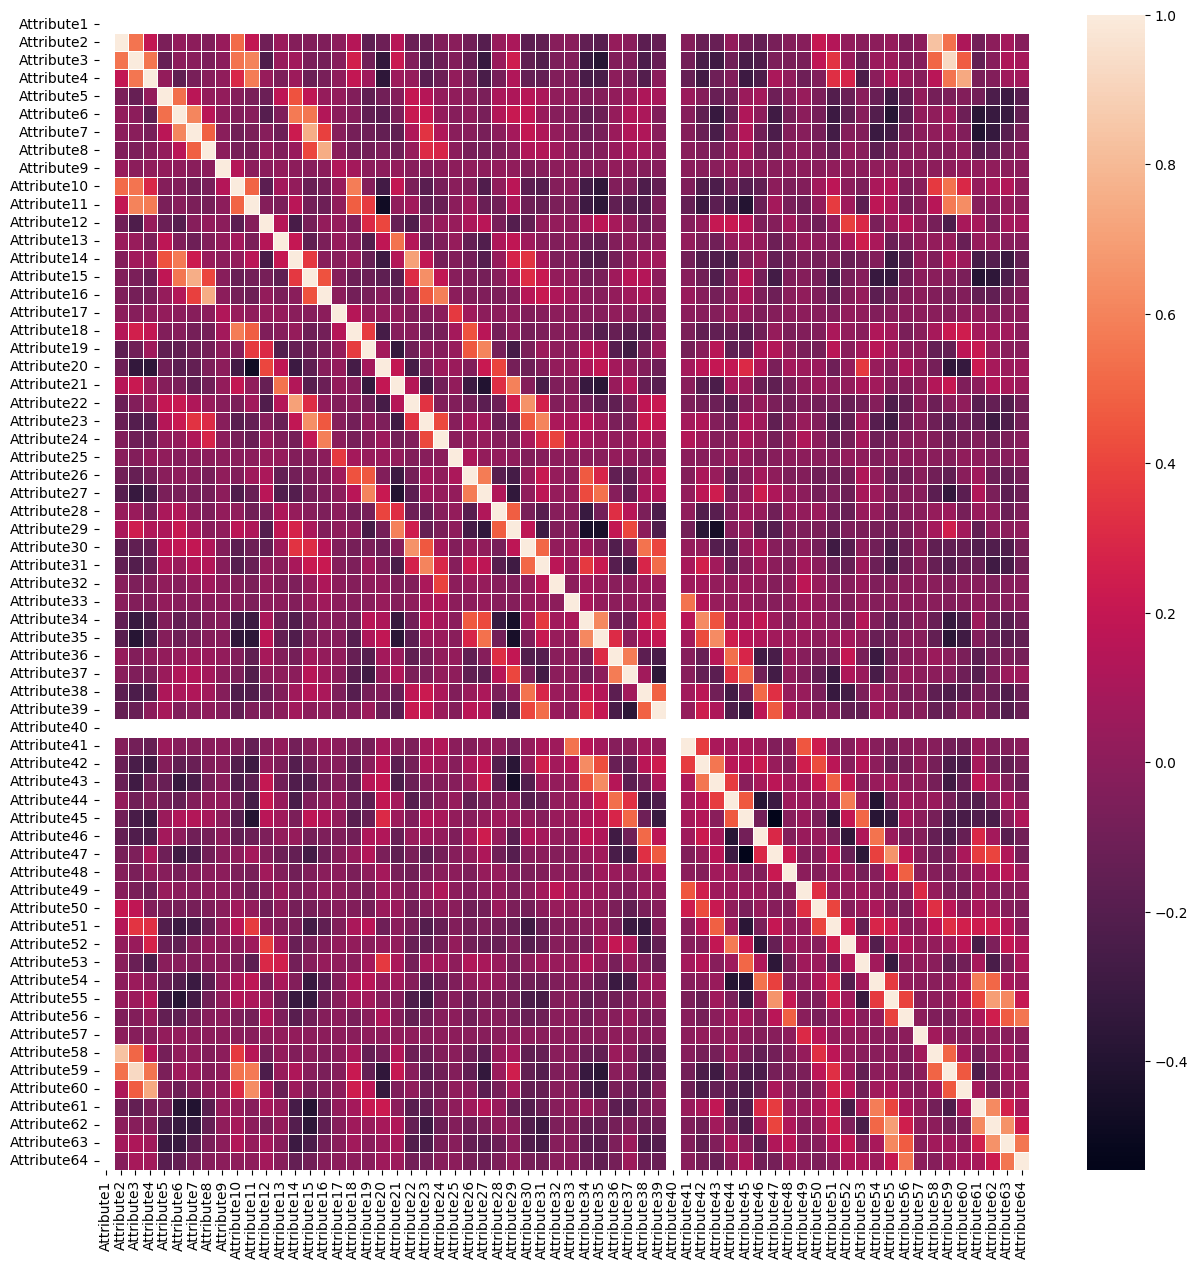

In [13]:
from sklearn.model_selection import train_test_split
#Ste up input variables(X) and output variable(y)
X = X
y = y
import seaborn as sns
#We examine correlated input variables to see if we should drop any
cormat = X.corr()
round(cormat,2)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormat, linewidths=0.5, ax=ax);

In [14]:

print(cormat)

             Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  \
Attribute1          NaN         NaN         NaN         NaN         NaN   
Attribute2          NaN    1.000000    0.549867    0.196655   -0.061135   
Attribute3          NaN    0.549867    1.000000    0.556814   -0.136197   
Attribute4          NaN    0.196655    0.556814    1.000000    0.027040   
Attribute5          NaN   -0.061135   -0.136197    0.027040    1.000000   
...                 ...         ...         ...         ...         ...   
Attribute60         NaN    0.116788    0.468903    0.738634   -0.037806   
Attribute61         NaN   -0.092348   -0.149310   -0.066774   -0.088337   
Attribute62         NaN   -0.000868   -0.018809   -0.038386   -0.235855   
Attribute63         NaN    0.078344    0.116831    0.069017   -0.301649   
Attribute64         NaN   -0.020594    0.088882    0.070791   -0.185907   

             Attribute6  Attribute7  Attribute8  Attribute9  Attribute10  ...  \
Attribute1        

In [18]:
#drop data
X = X

In [19]:
#Split data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:

#Set the random number generation seed so that results can be duplicated
np.random.seed(12345)

#Fit a Neural Network model with the training data
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=0, max_iter=300)
#mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', solver='adam', max_iter=20000)
mlp.fit(X_train.values,y_train)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(max_iter=300, random_state=0)

In [21]:
from sklearn.metrics import classification_report
#Provide quality of fit metrics with the test dataset
y_pred = mlp.predict(X_test)
#target_names = set(y)
print(X_test.columns)
print(classification_report(y_test, y_pred))

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36', 'Attribute37', 'Attribute38',
       'Attribute39', 'Attribute40', 'Attribute41', 'Attribute42',
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attribute52', 'Attribute53', 'Attribute54',
       'Attribute55', 'Attribute56', 'Attribute57', 'Attribute58',
       'Attribute59', 'Attribute60', 'Att

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [94]:
%pip install lime



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
#Use lime to explain one feature in the input data

import lime
from lime import lime_tabular

from lime.lime_tabular import LimeTabularExplainer

X_obs = X_test.iloc[7]
print(X_obs, y_pred[7])

explain = LimeTabularExplainer(training_data = X_train.values, 
                               mode = "classification", 
                               feature_names = X_train.columns)


#mlp.predict(X_obs)

#Explain one instance of the data with lime
lime_exp = explain.explain_instance(
    data_row=X_obs,
    predict_fn=mlp.predict_proba,
    num_features=4
)
lime_exp.show_in_notebook(show_table=True)

Attribute1      0
Attribute2      0
Attribute3      0
Attribute4      0
Attribute5      1
               ..
Attribute60     0
Attribute61     2
Attribute62    15
Attribute63     3
Attribute64     0
Name: 1893, Length: 64, dtype: int64 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

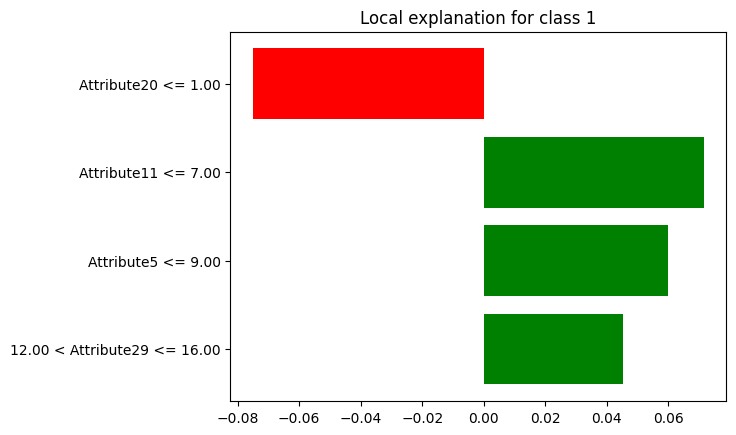

In [26]:
fig = lime_exp.as_pyplot_figure(label=1)

In [27]:
pd.DataFrame(lime_exp.as_list(),columns=['Feature','Contribution'])

Feature  Contribution
0           Attribute20 <= 1.00     -0.075030
1           Attribute11 <= 7.00      0.071509
2            Attribute5 <= 9.00      0.059737
3  12.00 < Attribute29 <= 16.00      0.045315

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36', 'Attribute37', 'Attribute38',
       'Attribute39', 'Attribute40', 'Attribute41', 'Attribute42',
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attribute52', 'Attribute53', 'Attribute54',
       'Attribute55', 'Attribute56', 'Attribute57', 'Attribute58',
       'Attribute59', 'Attribute60', 'Att

Text(0.5, 0, 'Mean |Weight|')

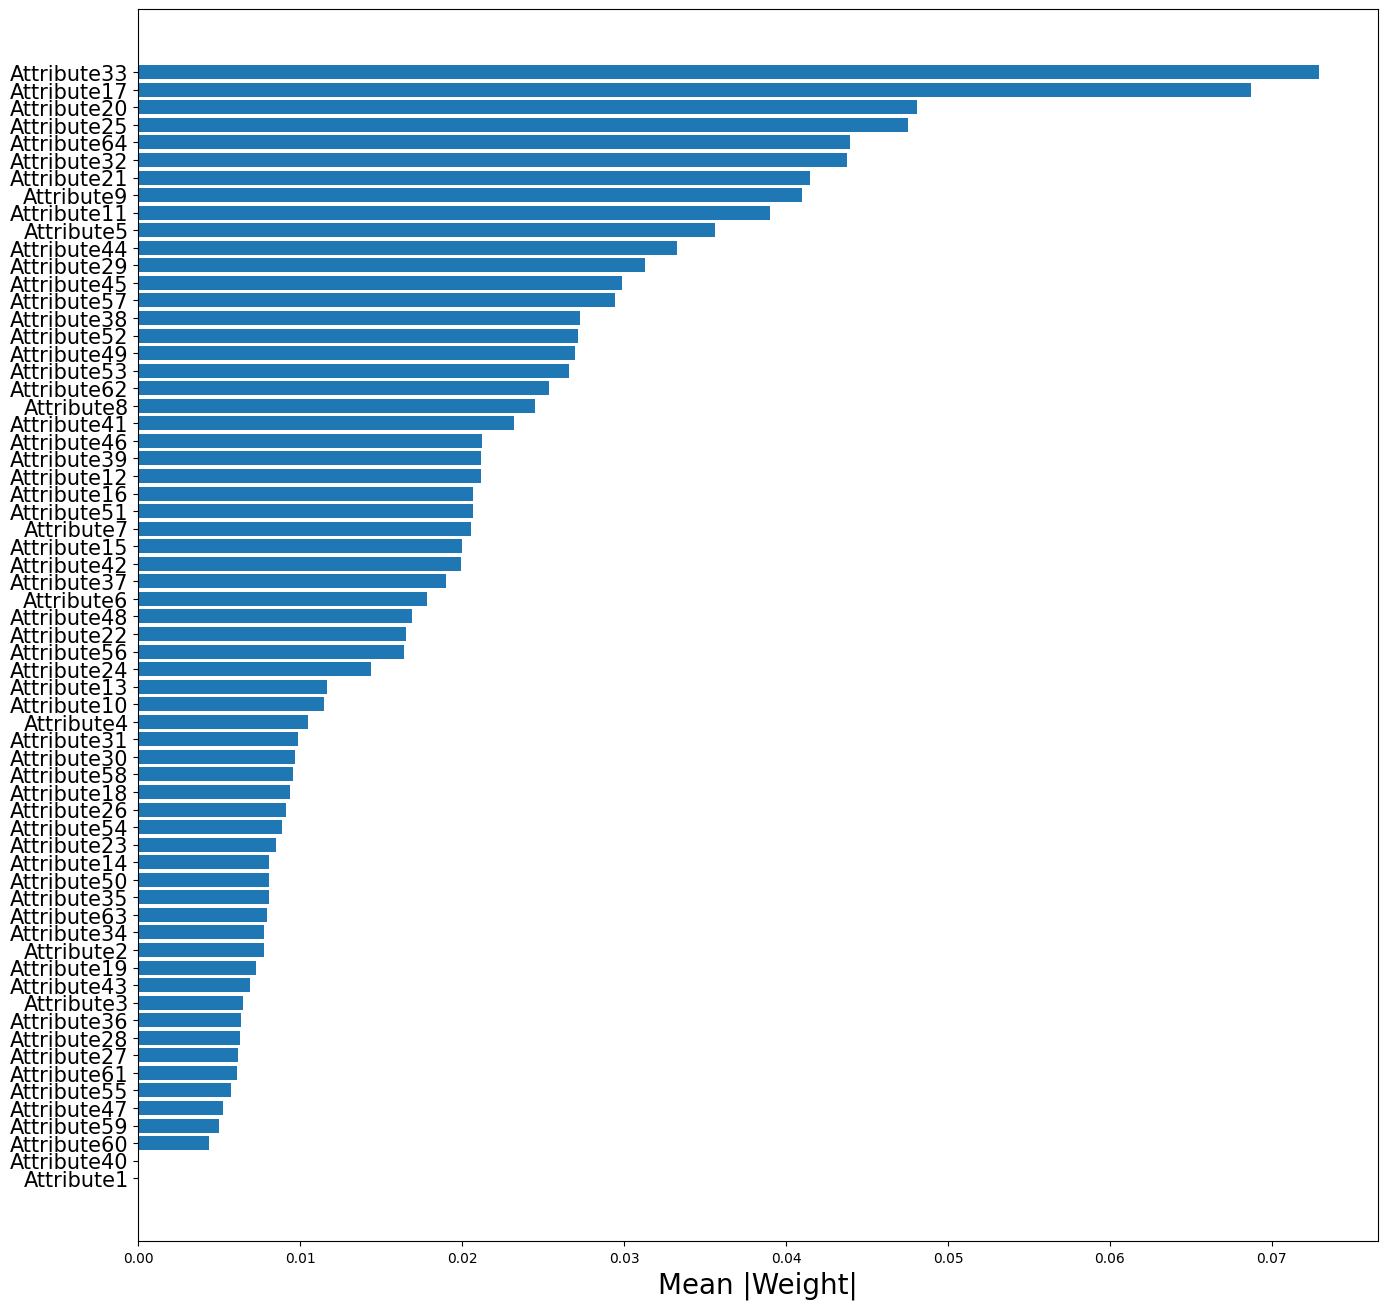

In [96]:
import matplotlib.pyplot as plt

weights = []

#Function to get weights from LIME explanation object
def return_weights(ep):
    exp_list = exp.as_map()[1]
    exp_list = sorted(exp_list, key=lambda x: x[0])
    exp_weight = [x[1] for x in exp_list]
    return exp_weight

print(X_test.columns)
print(len(X_test))

#Iterate over the rows in feature matrix
#and collect the LIME weights
#You can run for more elements----but we pick a max of 25
for x in range(min(len(X_test),25)):
    #Get explanation
    exp = lime_explainer.explain_instance(X_test.iloc[x],
                                 mlp.predict_proba, num_features = len(X_test.columns))
    #Get weights
    exp_weight = return_weights(exp)
    weights.append(exp_weight)

#Create DataFrame of the LIME weights
lime_weights = pd.DataFrame(data=weights,columns=X_test.columns)

#Get absolute value of the mean of LIME weights
abs_mean = lime_weights.abs().mean(axis=0)
abs_mean = pd.DataFrame(data={'feature':abs_mean.index, 'abs_mean':abs_mean})
abs_mean = abs_mean.sort_values('abs_mean')

#Plot abs mean LIME weights
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(16,16))

y_ticks = range(len(abs_mean))
y_labels = abs_mean.feature
plt.barh(y=y_ticks,width=abs_mean.abs_mean)

plt.yticks(ticks=y_ticks,labels=y_labels,size= 15)
plt.title('')
plt.ylabel('')
plt.xlabel('Mean |Weight|',size=20)

In [97]:
%pip install shap



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import shap
shap.initjs()


In [30]:
import warnings
warnings.filterwarnings("ignore")
#initialize shap explainer, mlp is the model used
explainer = shap.KernelExplainer(mlp.predict_proba, X_train)
#compute shap values for the train set
shap_values = explainer.shap_values(X=X_train, nsamples = 100)


Using 4496 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/4496 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 1 iterations, i.e. alpha=1.207e-01, with an active set of 1 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 119 iterations, i.e. alpha=1.506e-02, with an active set of 61 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:718: ConvergenceWarning: Early stopping the lars path, as the residues are small and t

In [31]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
#Now we show an interactive plot for all values/samples in the dataset
#to tie out before you need original sample ordering on the x axis and
#"f(x)" on the y-axis and look at x=14 and you will see proline of 325
shap.force_plot(explainer.expected_value[0], shap_values[:, :, 0], X_test)

  0%|          | 0/1124 [00:00<?, ?it/s]

Using 4496 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1124 [00:00<?, ?it/s]

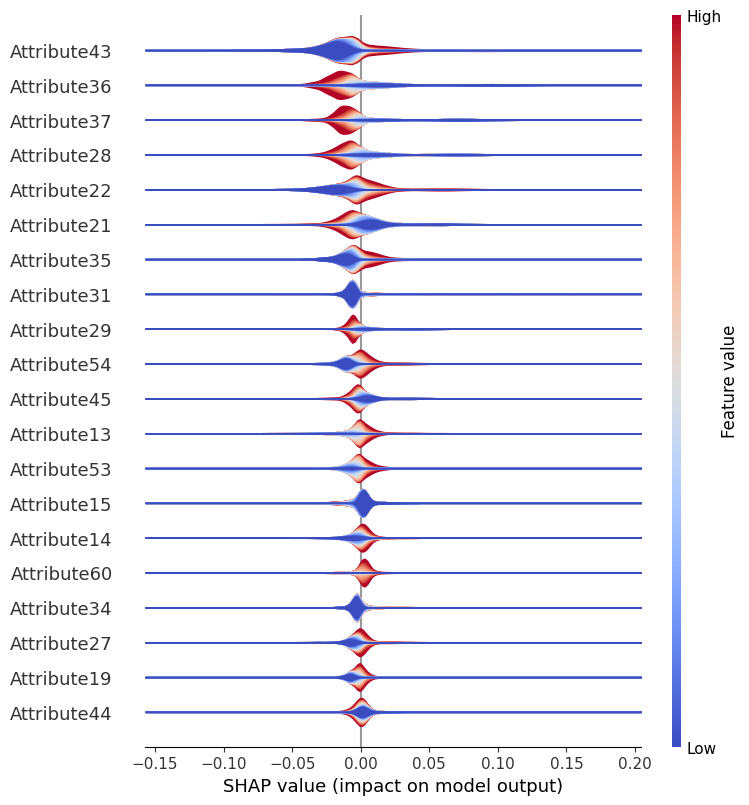

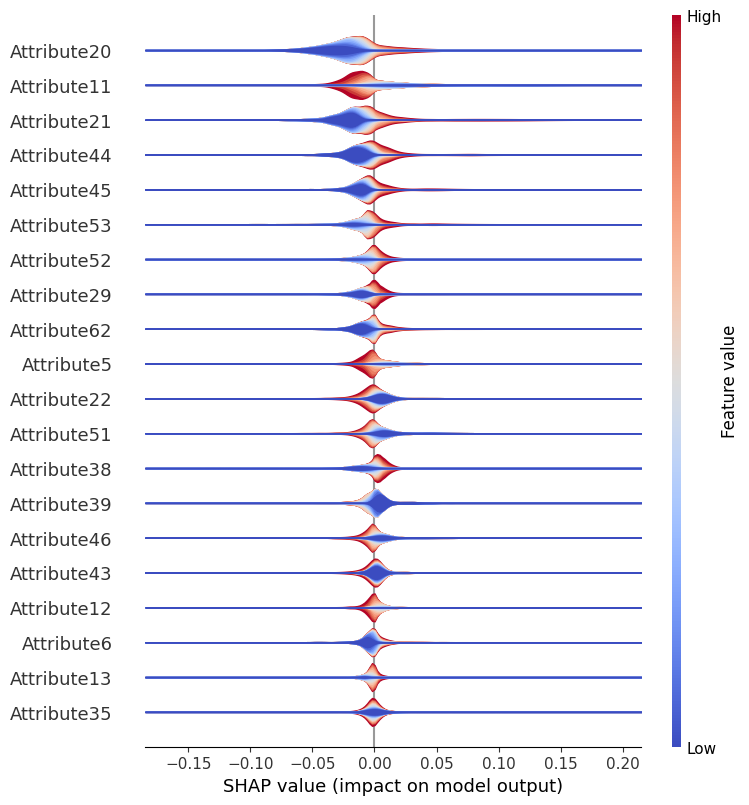

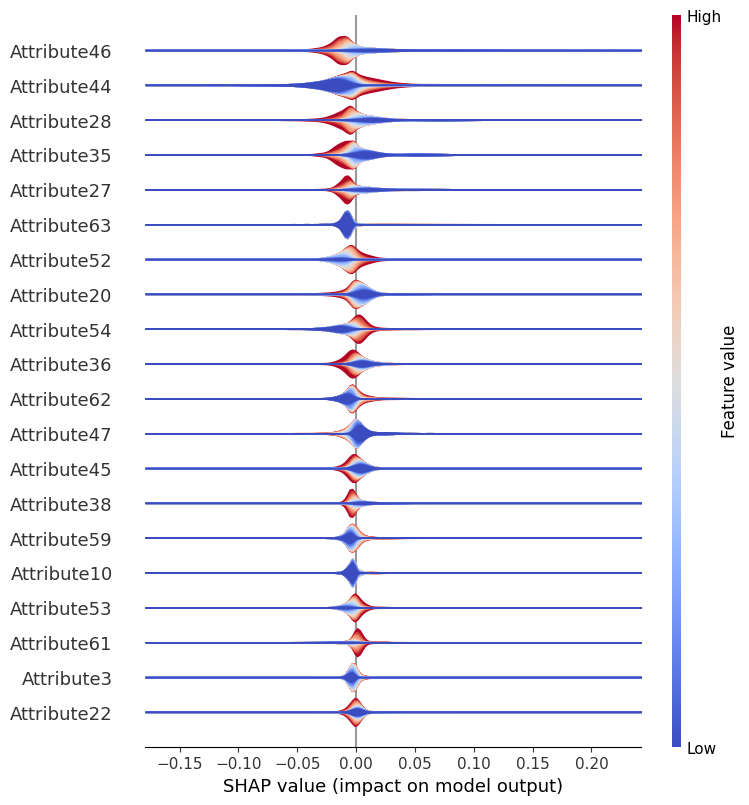

In [32]:
import warnings
warnings.filterwarnings("ignore")

shap.initjs()
#Create a summary plot of the influence of all input variables on the test dataset
shap_explainer = shap.KernelExplainer(mlp.predict_proba, X_train)

shap_vals = shap_explainer.shap_values(X_test)

feat_names = list(X_test.columns)
shap.plots.violin(shap_vals[:,:,0], features=X_test, feature_names=feat_names, plot_type="layered_violin") # label: 0
shap.plots.violin(shap_vals[:,:,1], features=X_test, feature_names=feat_names, plot_type="layered_violin") # label: 1
shap.plots.violin(shap_vals[:,:,2], features=X_test, feature_names=feat_names, plot_type="layered_violin") # label: 2
